In [1]:
# import sys
# from pathlib import Path
# root_dir = Path().resolve().parent  # goes one level up from `test/`
# sys.path.insert(0, str(root_dir))

Final Explanation:
## Overview
The provided visualization, titled "Sine Wave Visualization," depicts a smooth, continuous, and sinusoidal pattern characteristic of a sine wave. The wave exhibits a high degree of smoothness, with a root mean square (RMS) slope of approximately 0.075, indicating a gentle and consistent curvature. Over the interval from 0 to 10 on the X-axis, the wave completes approximately 1.5 cycles. The plot effectively illustrates the relationship between the X-axis and Y-axis values, showcasing a periodic function with a mean of 0.179 and a standard deviation of 0.668 for Y-values. The sinusoidal nature of the oscillation is evident, with the wave's peaks and troughs exhibiting a consistent and predictable pattern.

## Key Features
* **Periodicity**: The sine wave exhibits periodic behavior with a clear repeating pattern every approximately 4 units on the X-axis, calculated as the distance between consecutive peaks or troughs. A more precise calculation yields a per

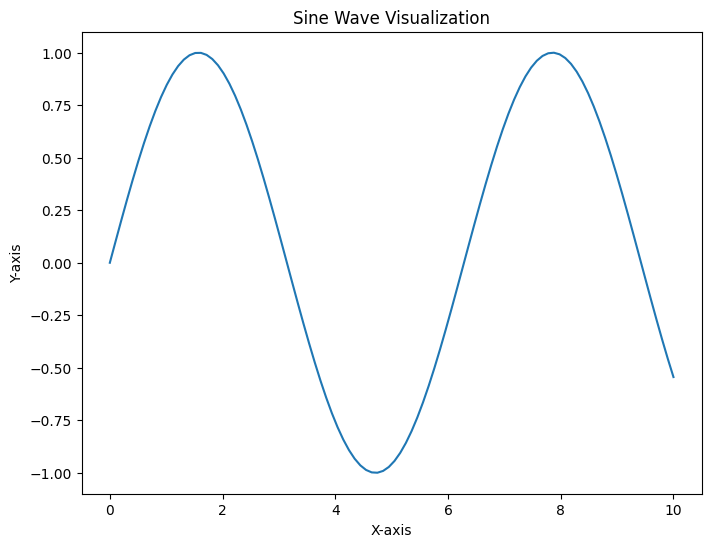

In [ ]:
import sys
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from plotsense import  recommender, plotgen, explainer
import openpyxl

In [3]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [4]:
titanic = sns.load_dataset("titanic")

In [5]:
data = r"PLD Data for Hackathon.xlsx"

In [6]:
hack = pd.read_excel(data, nrows=500)


In [7]:
hack.head()

,Count of id,id,lpa_name,status,valid_date,decision,decision_date,total_gained_units,total_lost_units,Total Net Units,...,remaining_gained_units,remaining_lost_units,actual_commencement_date,actual_completion_date,application_type,application_type_full,description,appeal_decision,appeal_decision_date,development_type
0,1,Wandsworth-2024_4282,Wandsworth,Approved,2024-12-06,Approved,2025-04-22,8,0,8,...,8,0,NaT,NaN,All Other,Full planning permission,Alterations including erection of roof extensi...,NaN,NaT,Minor dwellings
1,1,Barnet-25_0634_FUL,Barnet,Refused,2025-02-21,Refused,2025-04-17,2,2,0,...,2,2,NaT,NaN,All Other,Full planning permission,Two storey side/rear extension with pitched ro...,NaN,NaT,NaN
2,1,Barnet-25_0702_FUL,Barnet,Refused,2025-02-20,Refused,2025-04-17,1,0,1,...,1,0,NaT,NaN,All Other,Full planning permission,Erection of a single storey dwelling. Associat...,NaN,NaT,NaN
3,1,Bexley-25_00319_PRIOR,Bexley,Refused,2025-02-21,Refused,2025-04-17,2,0,2,...,2,0,NaT,NaN,Prior Approval,"Prior Approval: Change of use from Commercial,...",Notification of Prior Approval for change of u...,NaN,NaT,NaN
4,1,Bexley-25_00330_FUL,Bexley,Approved,2025-02-20,Approved,2025-04-17,0,1,-1,...,0,1,NaT,NaN,All Other,Full planning permission,Change of Use from Class C3 (Residential Dwell...,NaN,NaT,NaN


In [8]:
hack.columns

Index(['Count of id', 'id', 'lpa_name', 'status', 'valid_date', 'decision',
       'decision_date', 'total_gained_units', 'total_lost_units',
       'Total Net Units', 'commenced_gained_units', 'completed_gained_units',
       'completed_lost_units', 'Remaining Units Net', 'remaining_gained_units',
       'remaining_lost_units', 'actual_commencement_date',
       'actual_completion_date', 'application_type', 'application_type_full',
       'description', 'appeal_decision', 'appeal_decision_date',
       'development_type'],
      dtype='object')

In [9]:
hack.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Count of id               500 non-null    int64         
 1   id                        500 non-null    object        
 2   lpa_name                  500 non-null    object        
 3   status                    483 non-null    object        
 4   valid_date                500 non-null    datetime64[ns]
 5   decision                  498 non-null    object        
 6   decision_date             500 non-null    datetime64[ns]
 7   total_gained_units        500 non-null    int64         
 8   total_lost_units          500 non-null    int64         
 9   Total Net Units           500 non-null    int64         
 10  commenced_gained_units    500 non-null    int64         
 11  completed_gained_units    500 non-null    int64         
 12  completed_lost_units  

In [10]:
# recommendation = recommender(hack, n=20)
# recommendation

In [11]:
 # Create sample recommendations
test_rec = pd.DataFrame({
    'plot_type': ['bar', 'hist', 'boxplot', 'scatter', 'pie', 'violinplot'],
    'variables': ['Total Net Units, lpa_name', 'age', 'remaining_gained_units, application_type_full', 'age,fare', 'class', 'fare,class'],
    'ensemble_score': [0.9, 0.8, 0.7, 0.6, 0.5, 0.4]
})

test_rec

,plot_type,variables,ensemble_score
0,bar,"Total Net Units, lpa_name",0.9
1,hist,age,0.8
2,boxplot,"remaining_gained_units, application_type_full",0.7
3,scatter,"age,fare",0.6
4,pie,class,0.5
5,violinplot,"fare,class",0.4


In [12]:
# fig=plotgen(titanic, recommendation.iloc[4])

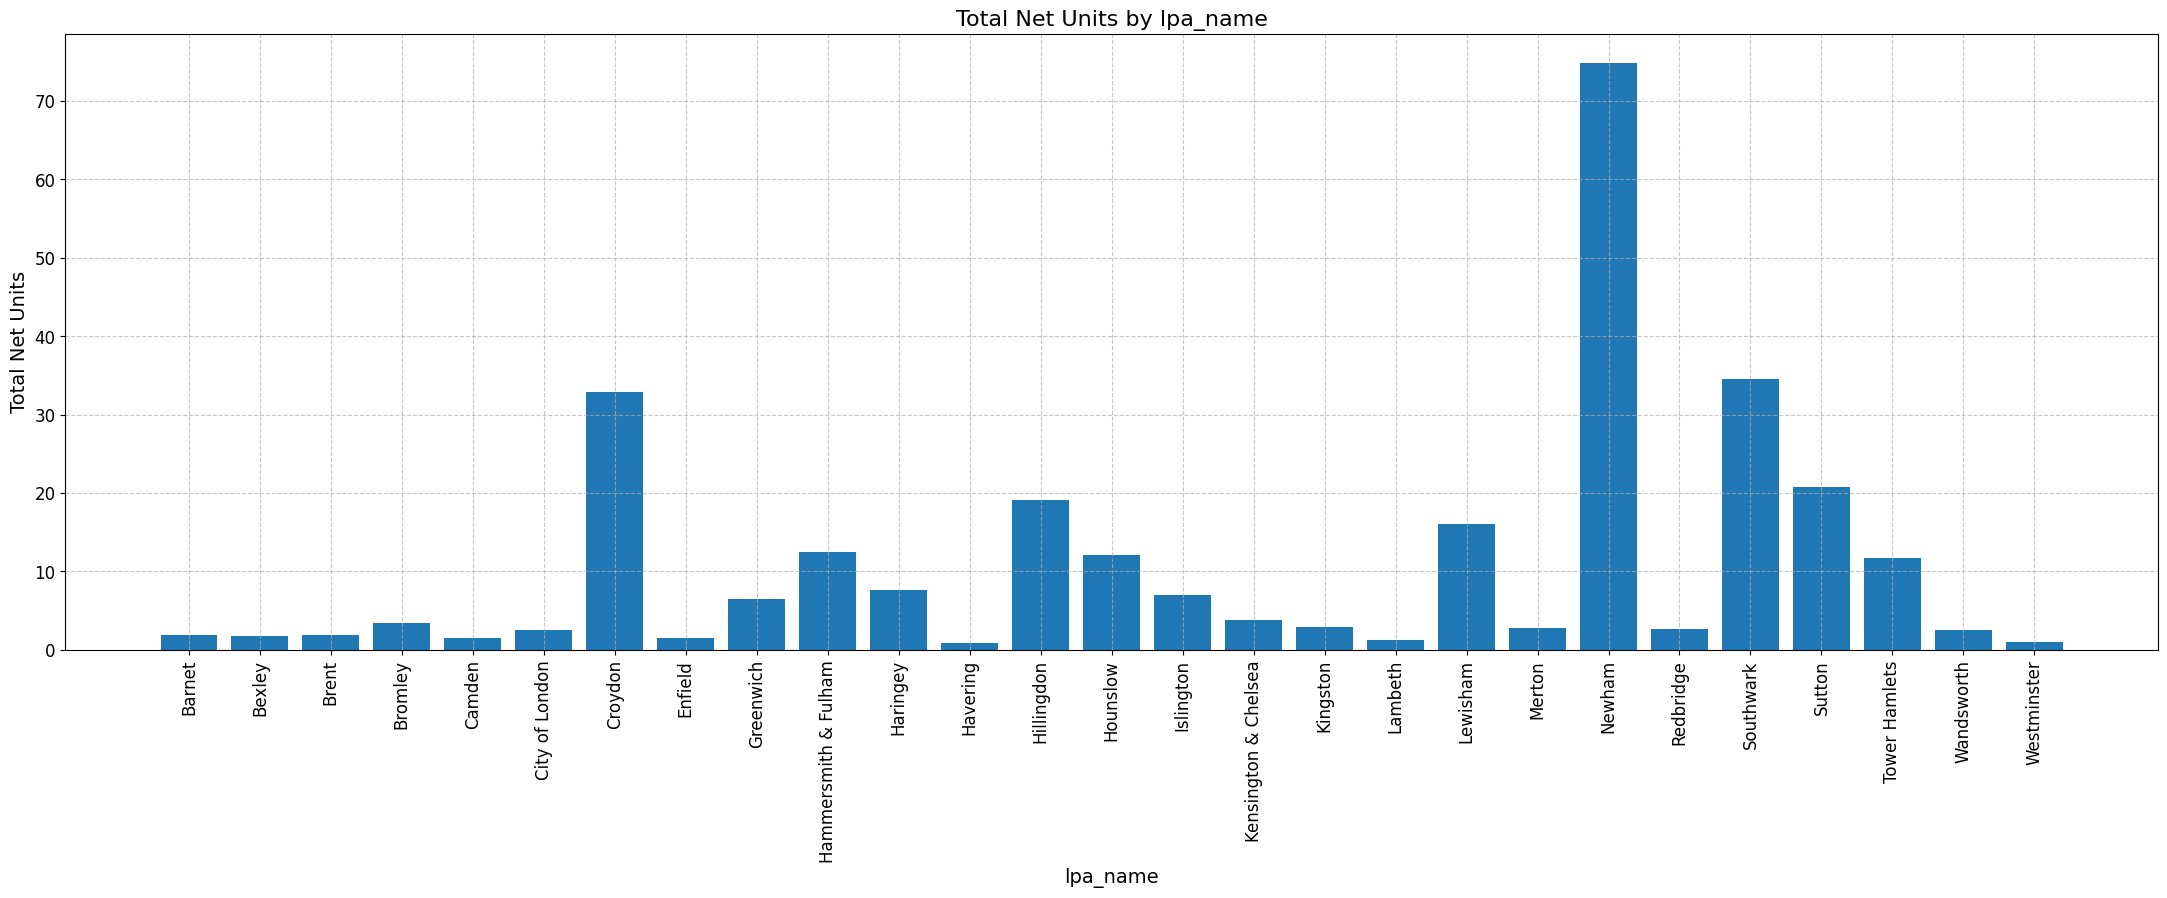

In [13]:
fig = plotgen(hack, 0, test_rec)

In [14]:
# explanation = explain_plot(fig)
# print("Generated Explanation:")
# print(explanation)

In [15]:
# explanation = explainer2(hack,fig)
# print("Generated Explanation:")
# print(explanation)

In [16]:
explanation = explainer7(fig)
print("Generated Explanation:")
print(explanation)

Generated Explanation:
## Explanation of Data Visualization

### Overview
The provided data visualization is a bar chart titled "Total Net Units by lpa_name," illustrating the total net units for various London boroughs. The x-axis lists the boroughs (lpa_name), and the y-axis represents the total net units, ranging from 0 to 70. The chart uses blue bars to visually represent the data for each borough, providing a clear comparison across different areas. This visualization aims to highlight disparities in development trends across London.

### Key Features
- **Boroughs Listed:** The chart includes a comprehensive list of London boroughs, such as Barnet, Bexley, Brent, Bromley, Camden, and many others, making it a thorough representation of London's boroughs.
- **Data Range:** The y-axis ranges from 0 to 70, with the exact minimum and maximum values being 1 (for multiple boroughs including Camden, Havering, Lambeth, Merton, Wandsworth, and Westminster) and 72 (for Newham), respectively.

In [17]:
# explanation1 = explainer(fig, prompt="newham")
# print("Generated Explanation with Custom Prompt:")      
# print(explanation1)

In [18]:
# explanation2 = explainer(fig,iterations=5)
# print("Generated Explanation with Custom Iterations:")
# print(explanation2)